In [86]:
import numpy as np
import pandas as pd

import seaborn
import matplotlib.pyplot as plt

seaborn.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 3.5})

**Read election data, and replace NaNs with 0**

In [87]:
data = pd.read_csv("historical_election_results.csv", encoding='ISO-8859-1')
data.fillna(0, inplace=True)

In [88]:
data.head()

,constituency_id,seats,constituency,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set
0,1,1,BATTERSEA NORTH,London,38552,0.0,0.000,0,0.000,5634,0.334,0.0,0.0,11231.0,0.666,16865,0.437,1918,1918-35
1,2,1,BATTERSEA SOUTH,London,43036,15670.0,0.682,2273,0.099,3383,0.147,0.0,0.0,1657.0,0.072,22983,0.534,1918,1918-35
2,3,1,BERMONDSEY ROTHERHITHE,London,25008,5639.0,0.500,3889,0.345,1750,0.155,0.0,0.0,0.0,0,11278,0.451,1918,1918-35
3,4,1,BERMONDSEY WEST BERMONDSEY,London,23100,0.0,0.000,4260,0.405,1956,0.186,0.0,0.0,4292.0,0.408,10508,0.455,1918,1918-35
4,5,1,BETHNAL GREEN NORTH EAST,London,25253,0.0,0.000,0,0.000,0,0.000,0.0,0.0,7887.0,1,7887,0.312,1918,1918-35


In [89]:
vote_columns = [col for col in data if "votes" in col and "total" not in col]
votes = pd.DataFrame()

for col in vote_columns:
    new_votes[col] = pd.to_numeric(data[col], errors="coerce").fillna(0.0)

data["won_by"] = new_votes.idxmax(axis="columns").str.replace("_votes", "").str.replace(" ", "")
data

,constituency_id,seats,constituency,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set,won_by
0,1,1,BATTERSEA NORTH,London,38552,0.0,0.000,0,0.000,5634,0.334,0.0,0.0,11231.0,0.666,16865,0.437,1918,1918-35,oth
1,2,1,BATTERSEA SOUTH,London,43036,15670.0,0.682,2273,0.099,3383,0.147,0.0,0.0,1657.0,0.072,22983,0.534,1918,1918-35,con
2,3,1,BERMONDSEY ROTHERHITHE,London,25008,5639.0,0.500,3889,0.345,1750,0.155,0.0,0.0,0.0,0,11278,0.451,1918,1918-35,con
3,4,1,BERMONDSEY WEST BERMONDSEY,London,23100,0.0,0.000,4260,0.405,1956,0.186,0.0,0.0,4292.0,0.408,10508,0.455,1918,1918-35,oth
4,5,1,BETHNAL GREEN NORTH EAST,London,25253,0.0,0.000,0,0.000,0,0.000,0.0,0.0,7887.0,1,7887,0.312,1918,1918-35,oth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,E14000993,1,Thirsk and Malton,Yorkshire and The Humber,80991,35634.0,0.630,6774,0.120,10480,0.190,0.0,0.0,3700.0,0.065,56588,0.699,2019,2010-19,con
17694,E14001009,1,Wakefield,Yorkshire and The Humber,70192,21283.0,0.473,1772,0.039,17925,0.400,0.0,0.0,4047.0,0.090,45027,0.641,2019,2010-19,con
17695,E14001028,1,Wentworth and Dearne,Yorkshire and The Humber,74536,14577.0,0.351,1705,0.041,16742,0.400,0.0,0.0,8533.0,0.205,41557,0.558,2019,2010-19,lab
17696,E14001061,1,York Central,Yorkshire and The Humber,74899,13767.0,0.278,4149,0.084,27312,0.550,0.0,0.0,4277.0,0.086,49505,0.661,2019,2010-19,lab


In [92]:
election_data = {}

for index, row in enumerate(data.itertuples()):
    
    if row.election not in election_data:
        election_data[row.election] = {
            "lab": 0,
            "con": 0,
            "lib": 0,
            "natSW": 0,
            "oth": 0,
        }
    
    election_data[row.election][row.won_by] += 1


majorities = []

for year, seats in election_data.items():
    winning_party_seats = max(seats.values())
    total_seats = sum(seats.values())
    seats_won_by_other_parties = total_seats - winning_party_seats
    majority = winning_party_seats - seats_won_by_other_parties
    majorities.append((year, majority))
    print(f"year = {year}, seats = {seats}, total_seats = {total_seats}, majority = {majority}")


year = 1918, seats = {'lab': 44, 'con': 394, 'lib': 69, 'natSW': 0, 'oth': 181}, total_seats = 688, majority = 100
year = 1922, seats = {'lab': 138, 'con': 309, 'lib': 90, 'natSW': 0, 'oth': 58}, total_seats = 595, majority = 23
year = 1923, seats = {'lab': 186, 'con': 231, 'lib': 173, 'natSW': 0, 'oth': 5}, total_seats = 595, majority = -133
year = 1924, seats = {'lab': 144, 'con': 397, 'lib': 43, 'natSW': 0, 'oth': 11}, total_seats = 595, majority = 199
year = 1929, seats = {'lab': 279, 'con': 252, 'lib': 60, 'natSW': 0, 'oth': 4}, total_seats = 595, majority = -37
year = 1931, seats = {'lab': 41, 'con': 427, 'lib': 74, 'natSW': 0, 'oth': 53}, total_seats = 595, majority = 259
year = 1935, seats = {'lab': 145, 'con': 367, 'lib': 41, 'natSW': 0, 'oth': 42}, total_seats = 595, majority = 139
year = 1945, seats = {'lab': 381, 'con': 191, 'lib': 13, 'natSW': 0, 'oth': 35}, total_seats = 620, majority = 142
year = 1950, seats = {'lab': 314, 'con': 280, 'lib': 11, 'natSW': 0, 'oth': 20}, t

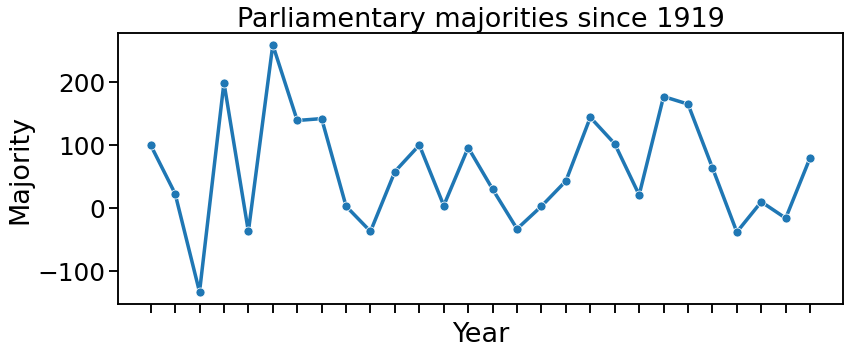

In [110]:
data = pd.DataFrame({
    "Year": [x[0] for x in majorities], 
    "Majority": [x[1] for x in majorities]
})

plt.rcParams['figure.figsize'] = [13, 5]
chart = seaborn.lineplot(x="Year", y="Majority", data=data, marker='o')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=360, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)
plt.title("Parliamentary majorities since 1919");